<a href="https://colab.research.google.com/github/Yogesh-8998/Energy-Appliances-Prediction/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
import datetime as dt
 
%matplotlib inline
 
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
%matplotlib inline
 
from datetime import datetime
import time

from enum import Enum
from itertools import combinations, product
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
 
import os
 
FIGURE_SIZE = (15, 12)
SNS_FIGURE_SIZE = (20, 15)
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter /Machine Learning/Capstone Project /data_application_energy.csv")

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df.isnull

<bound method DataFrame.isnull of                       date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0      2016-01-11 17:00:00          60      30  ...   5.300000  13.275433  13.275433
1      2016-01-11 17:10:00          60      30  ...   5.200000  18.606195  18.606195
2      2016-01-11 17:20:00          50      30  ...   5.100000  28.642668  28.642668
3      2016-01-11 17:30:00          50      40  ...   5.000000  45.410389  45.410389
4      2016-01-11 17:40:00          60      40  ...   4.900000  10.084097  10.084097
...                    ...         ...     ...  ...        ...        ...        ...
19730  2016-05-27 17:20:00         100       0  ...  13.333333  43.096812  43.096812
19731  2016-05-27 17:30:00          90       0  ...  13.300000  49.282940  49.282940
19732  2016-05-27 17:40:00         270      10  ...  13.266667  29.199117  29.199117
19733  2016-05-27 17:50:00         420      10  ...  13.233333   6.322784   6.322784
19734  2016-05-27 18:00:00     

EDA

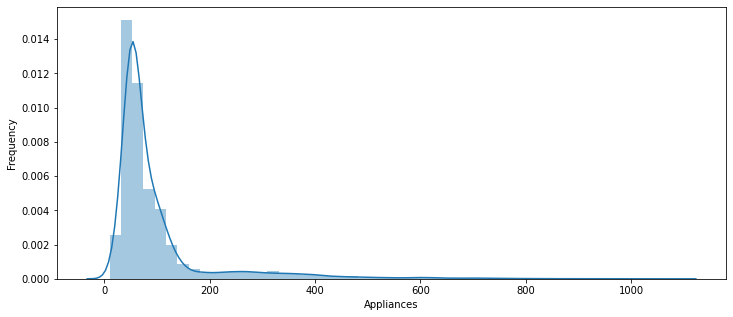

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in wh')
plt.ylabel('Frequency')
sns.distplot(df['Appliances'])

The Appliances is positively skewed, most of the values are around mean 100Wh 

In [ ]:
# plt.figure(figsize=(12,5))
# plt.xlabel('Appliance consumption in wh')
# plt.ylabel('Frequency')
# sns.distplot(df['Appliances'])

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
temp_col = ['T1', 'T2','T3','T4','T5','T6','T7','T8','T9','T_out']

In [ ]:
humidity_col = ['RH_1', 'RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']

In [ ]:
weather_col = ['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint']

In [ ]:
random_col = ['rv1', 'rv2']

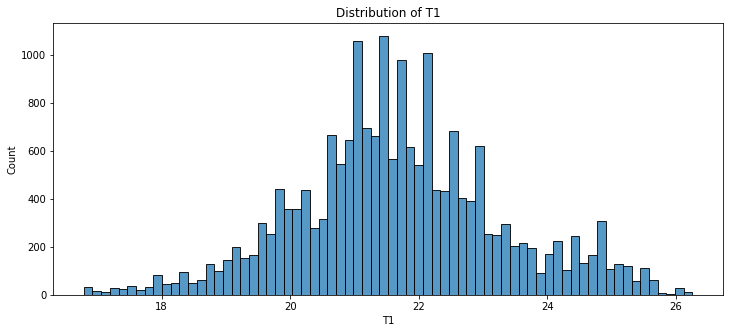

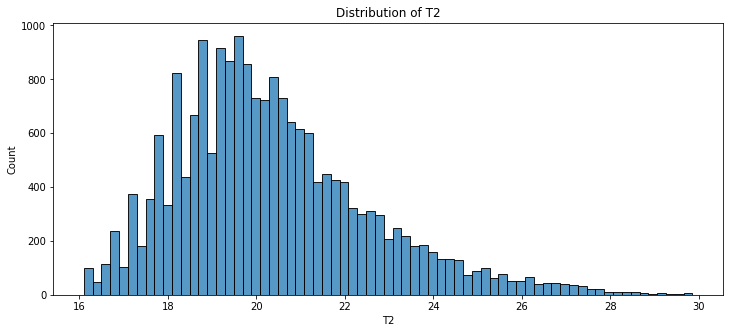

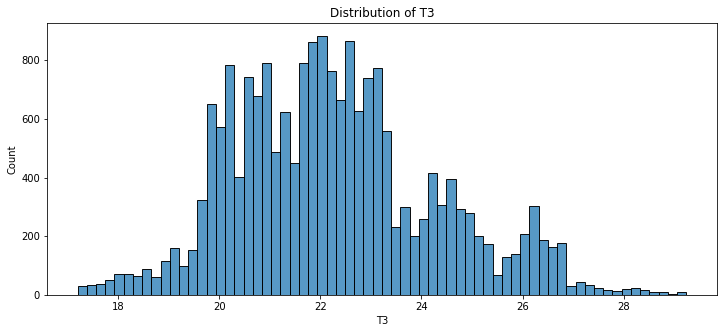

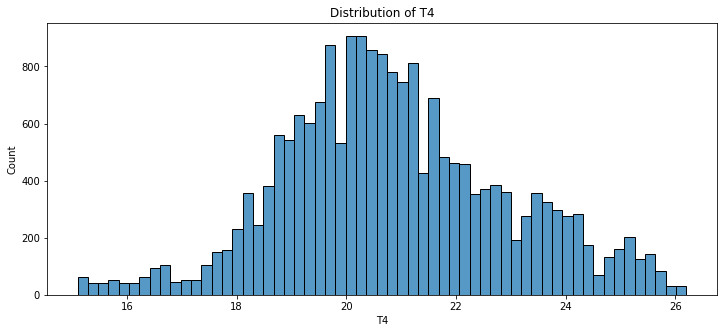

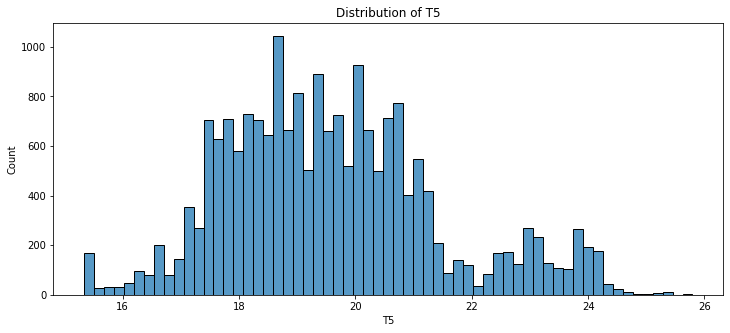

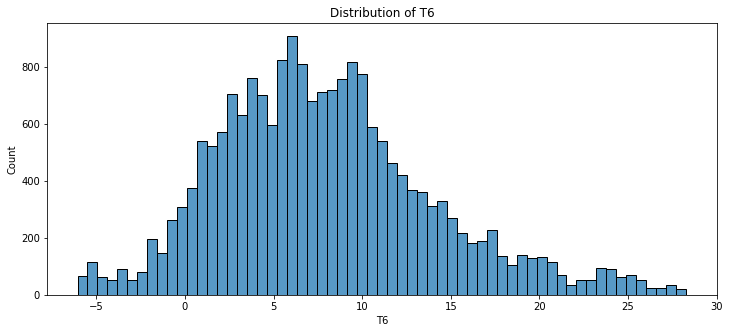

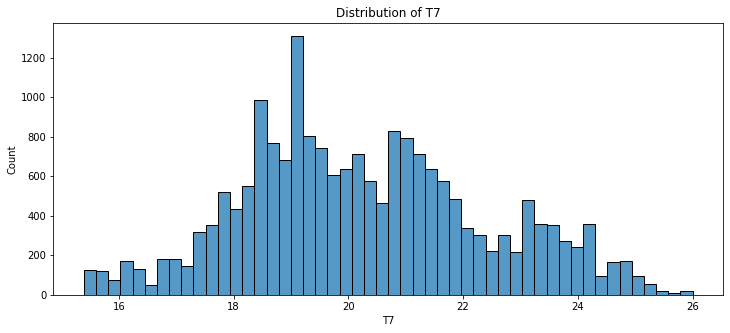

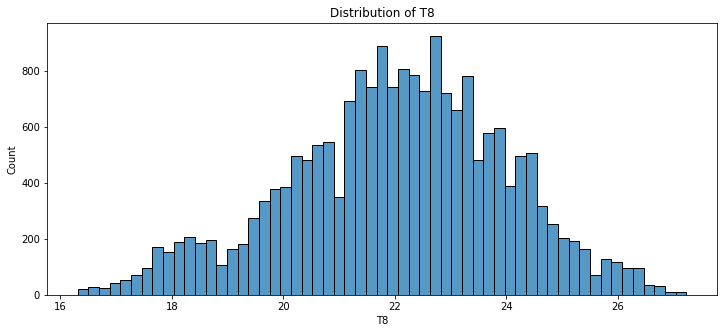

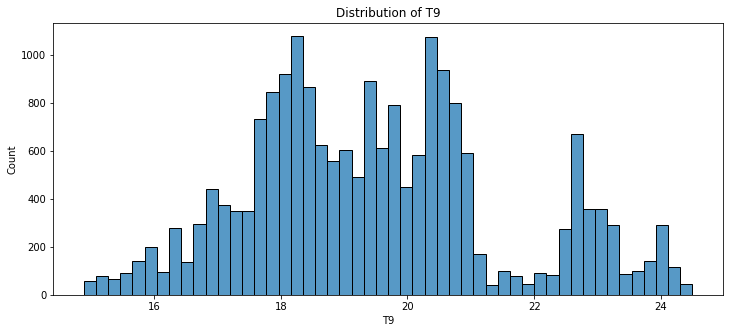

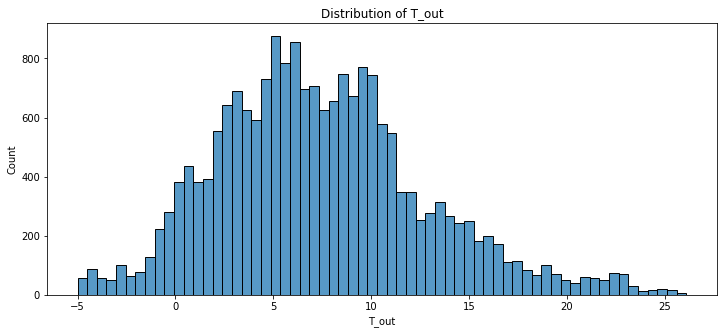

In [ ]:
for i, col in enumerate(df[temp_col]):
  plt.figure(figsize=(12,5))
  sns.histplot(data=df, x = col)
  plt.title(f'Distribution of {col}')
  plt.show()

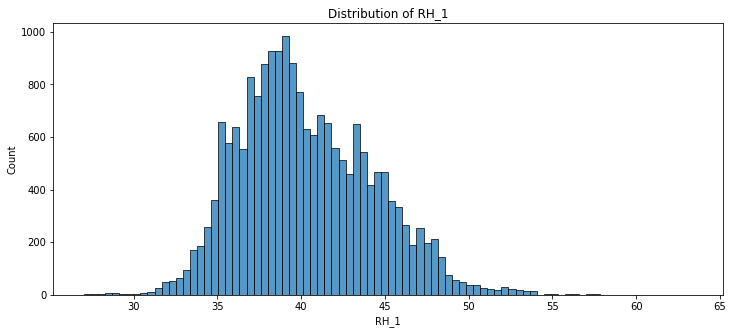

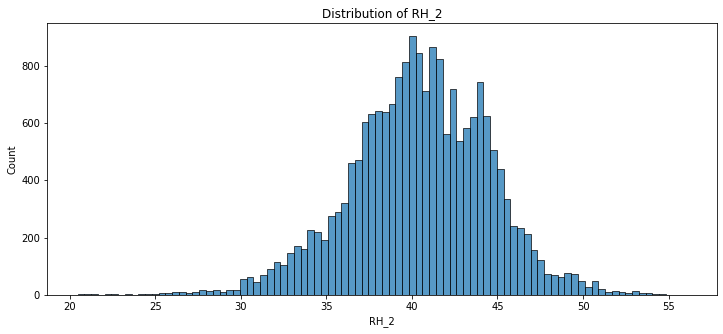

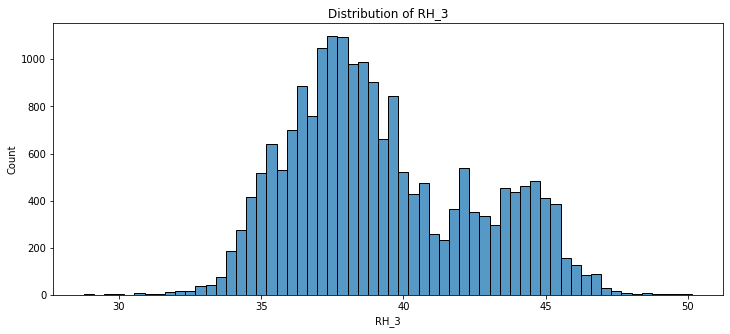

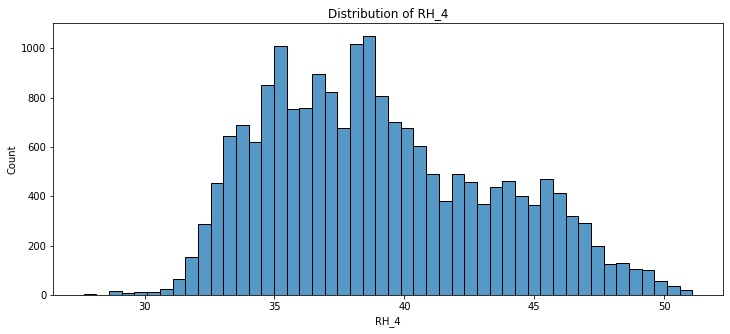

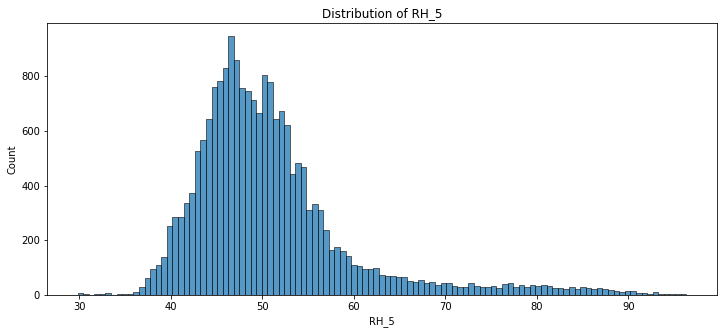

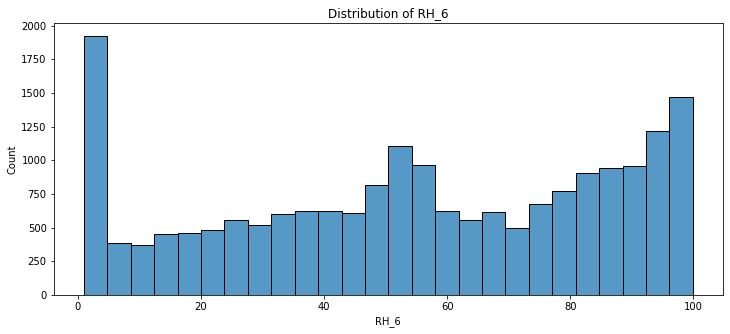

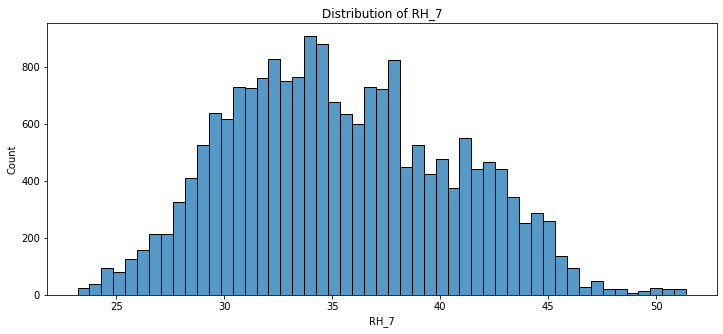

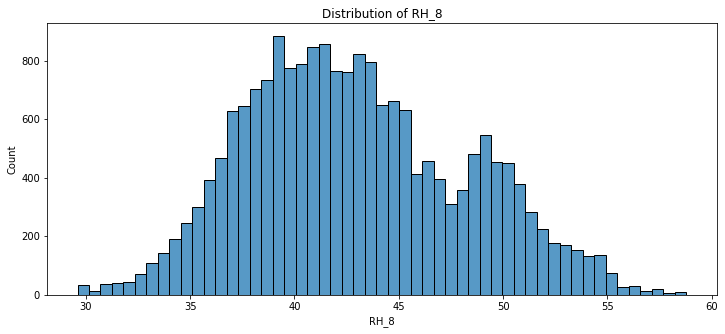

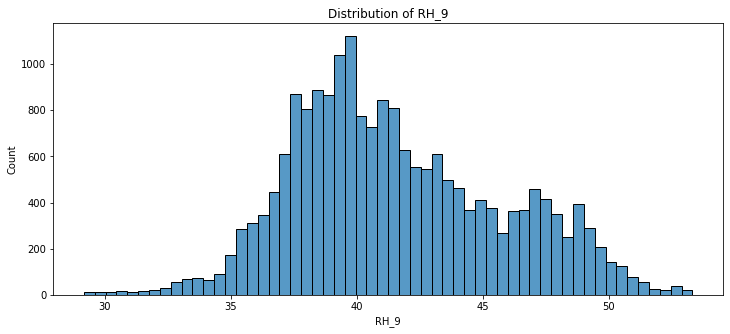

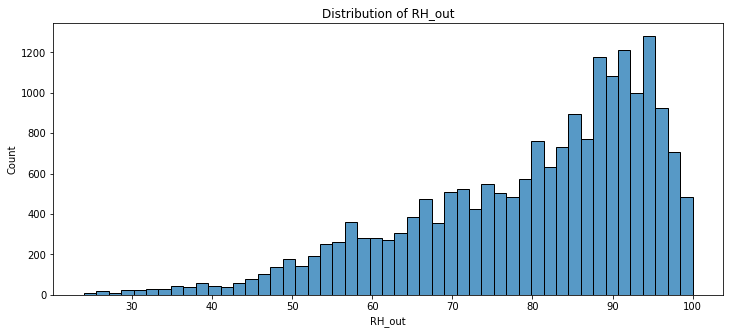

In [ ]:
for i, col in enumerate(df[humidity_col]):
  plt.figure(figsize=(12,5))
  sns.histplot(data=df, x = col)
  plt.title(f'Distribution of {col}')
  plt.show()

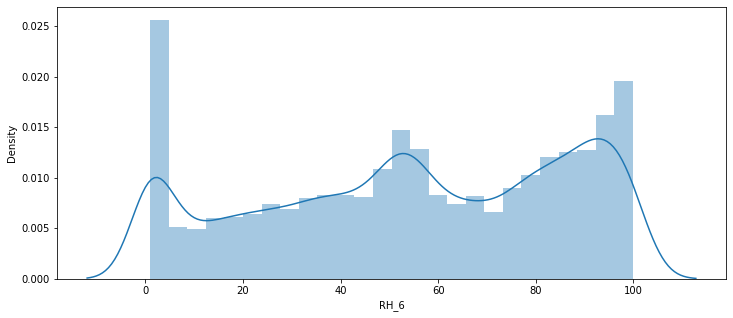

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['RH_6'])

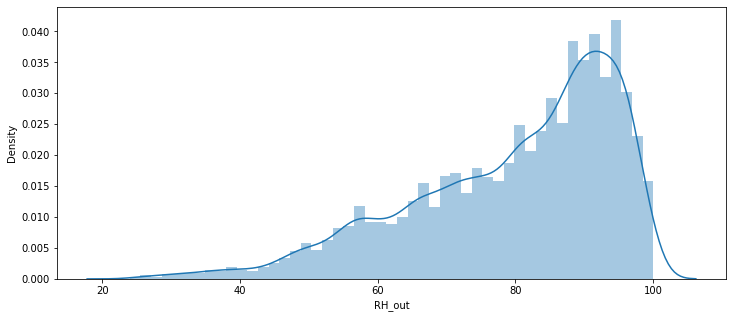

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['RH_out'])

Temperature - All the columns follow normal distribution except T9

Humidity - All columns follow normal distribution except RH_6 and RH_out, primarly because these sensors are outside the house

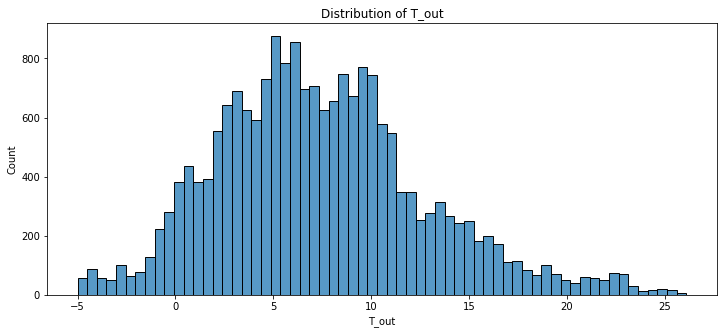

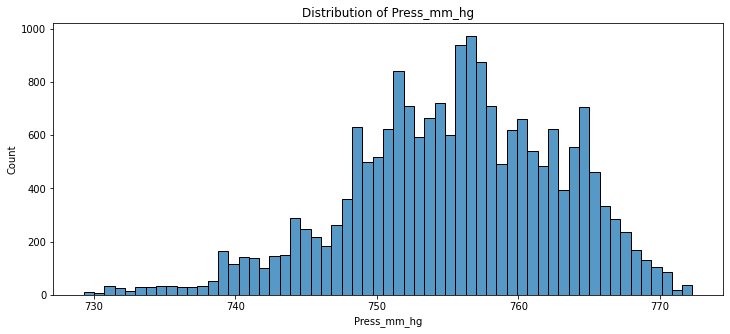

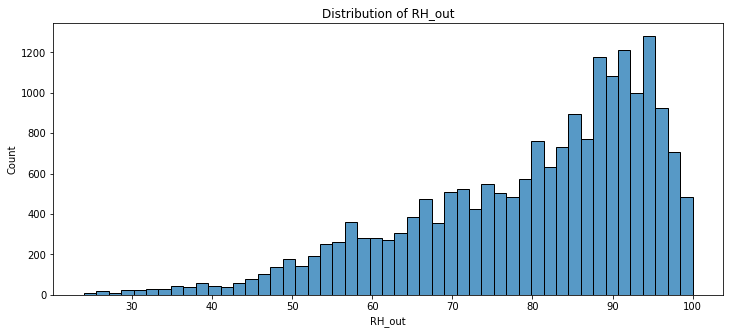

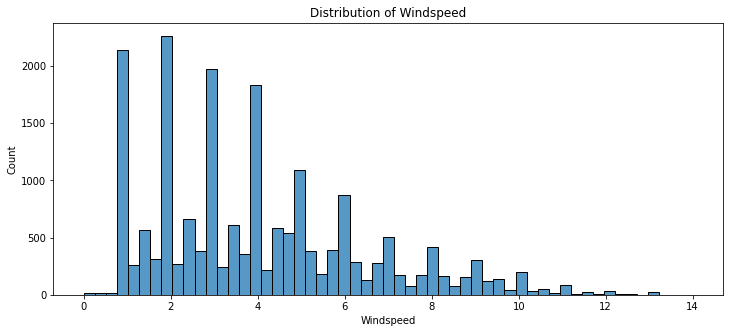

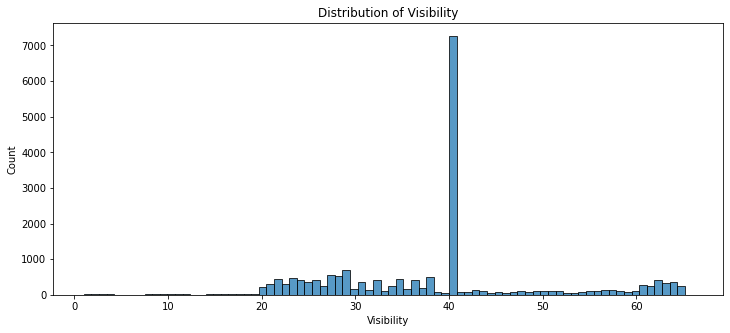

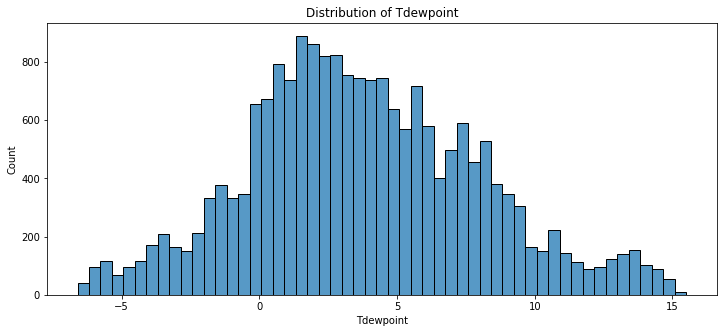

In [ ]:
for i, col in enumerate(df[weather_col]):
  plt.figure(figsize=(12,5))
  sns.histplot(data=df, x = col)
  plt.title(f'Distribution of {col}')
  plt.show()

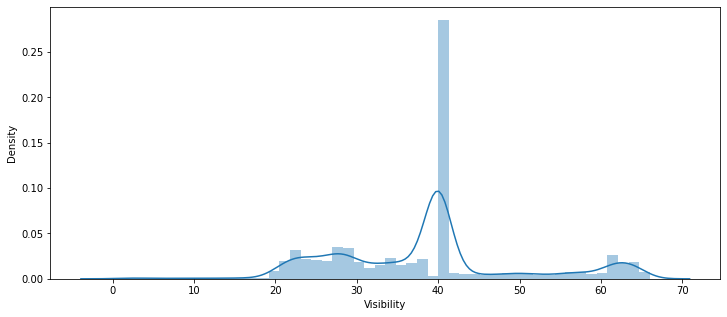

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['Visibility'])

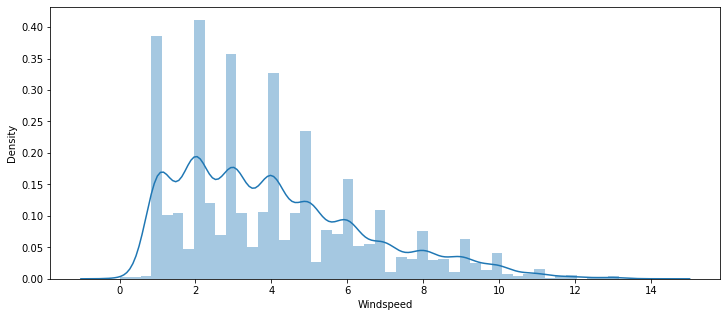

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(df['Windspeed'])

Visibility is negatively skewed


Windspeed is positively skewed

In [ ]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

As here we can see the number of zeros count is 15252 which means around 90% of the values are zero

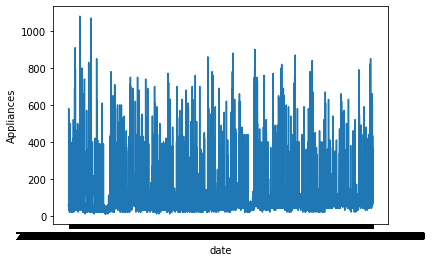

In [ ]:
sns.lineplot(df['date'],df['Appliances'])

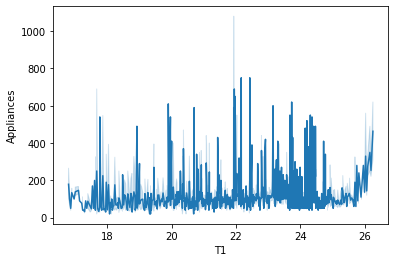

In [ ]:
sns.lineplot(df['T1'],df['Appliances'])

In [ ]:
sns.lineplot(df['date'],df['Appliances'])

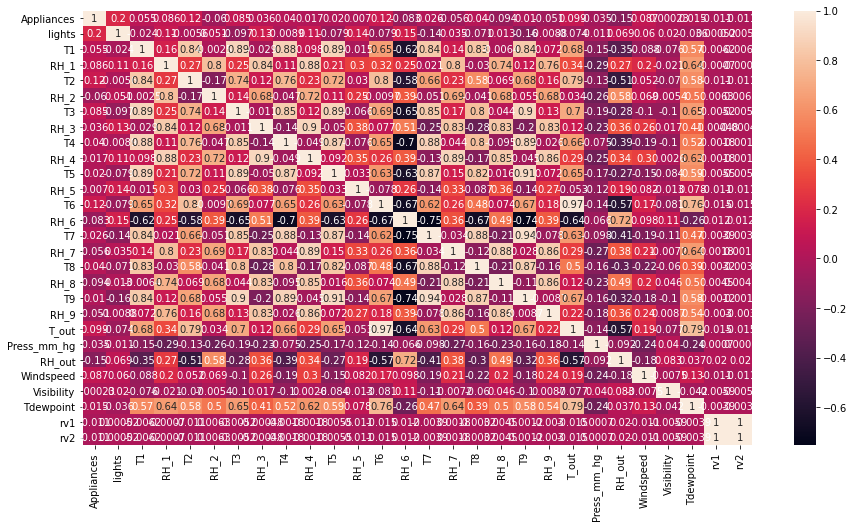

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df['weekday'] =((pd.to_datetime(df['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
df['weekday'].value_counts()

0.0    14263
1.0     5472
Name: weekday, dtype: int64

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.day
df['dayofweek']=df['date'].dt.dayofweek

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour,dayofweek
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,11,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,11,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,11,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11,11,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11,11,0


In [ ]:
 irrelevant_features = []
irrelevant_features.append('date')

In [ ]:
 df['weekday'] = df['dayofweek'].apply(lambda x: x//5)
irrelevant_features.append('dayofweek')

In [ ]:
 gb_month = df.groupby(['month'])
gb_hour = df.groupby(['hour'])

Text(0, 0.5, 'Temprature[C]')

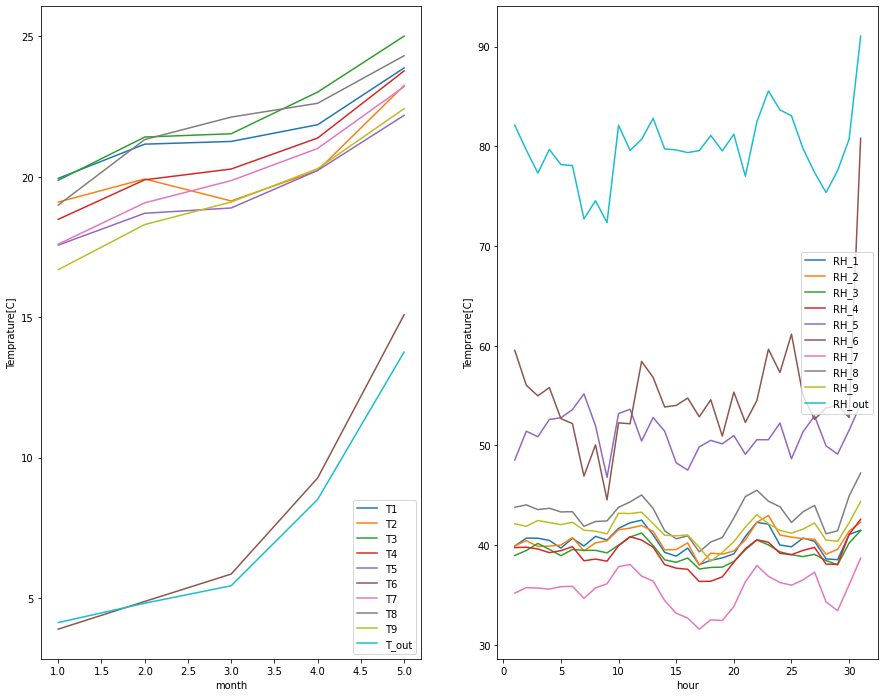

In [ ]:
ccgroup1_gb_month = gb_month[temp_col]
ccgroup1_gb_hour = gb_hour[humidity_col]
 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=FIGURE_SIZE)
ccgroup1_gb_month.mean().plot(ax=ax1)
ccgroup1_gb_hour.mean().plot(ax=ax2)
 
ax1.set_ylabel('Temprature[C]')
ax2.set_ylabel('Temprature[C]')

In [ ]:
 import dateutil
 df["exact_date"]=df['date'].str.split(' ').str[0]

df["hours"]=(df['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
df["seconds"]=((df['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

df["week"]=(df['date'].str.split(' ').str[0])
df["week"]=(df['week'].apply(dateutil.parser.parse, dayfirst=True))
df["weekday"]=(df['week'].dt.dayofweek).astype(str).astype(int)
df["week"]=(df['week'].dt.day_name())

df['log_appliances'] = np.log(df.Appliances)
df['hour*lights'] = df.hours * df.lights
df['hour_avg'] = list(map(dict(df.groupby('hours')["Appliances"].mean()).get, df.hours))

df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,exact_date,hours,seconds,week,weekday,log_appliances,hour*lights,hour_avg
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11,17,0,Tuesday,1,4.094345,510,161.352657
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11,17,600,Tuesday,1,4.094345,510,161.352657
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11,17,1200,Tuesday,1,3.912023,510,161.352657
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11,17,1800,Tuesday,1,3.912023,680,161.352657
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11,17,2400,Tuesday,1,4.094345,680,161.352657


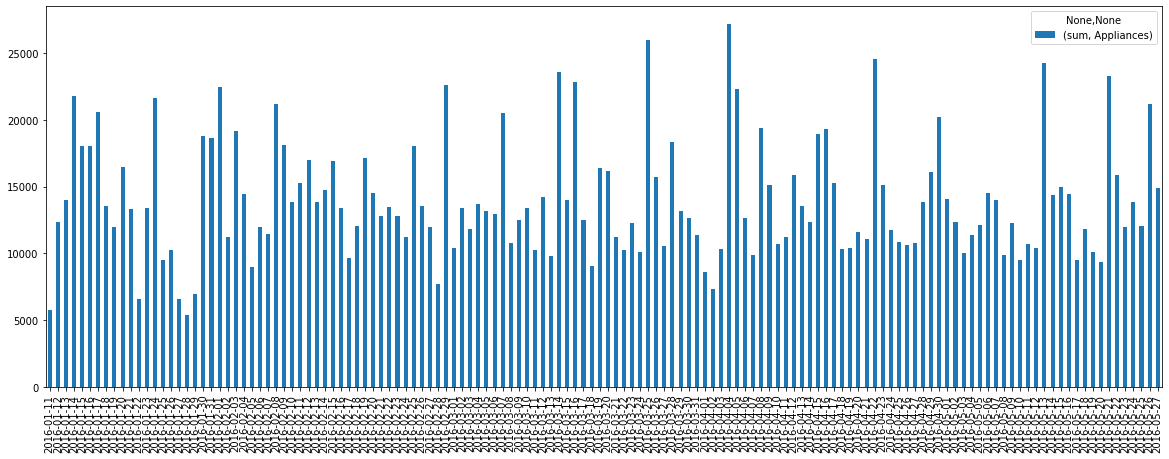

In [ ]:
dates=df["exact_date"].unique()
arranged_day = pd.Categorical(df["exact_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
table = pd.pivot_table(df,values="Appliances",index=date_series, aggfunc=[np.sum],fill_value=0)
table.plot(kind="bar",figsize=(20, 7))
plt.show()

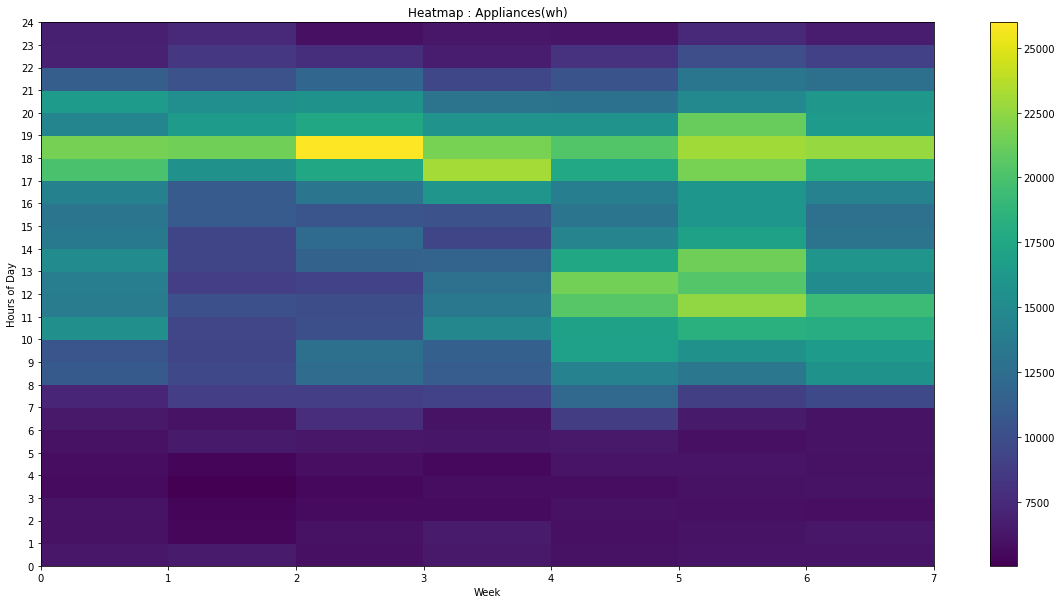

In [ ]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(df["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(df,index=["hours"],
               values="Appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : Appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)+1))

plt.xlabel("Week")
plt.ylabel("Hours of Day")
plt.show()

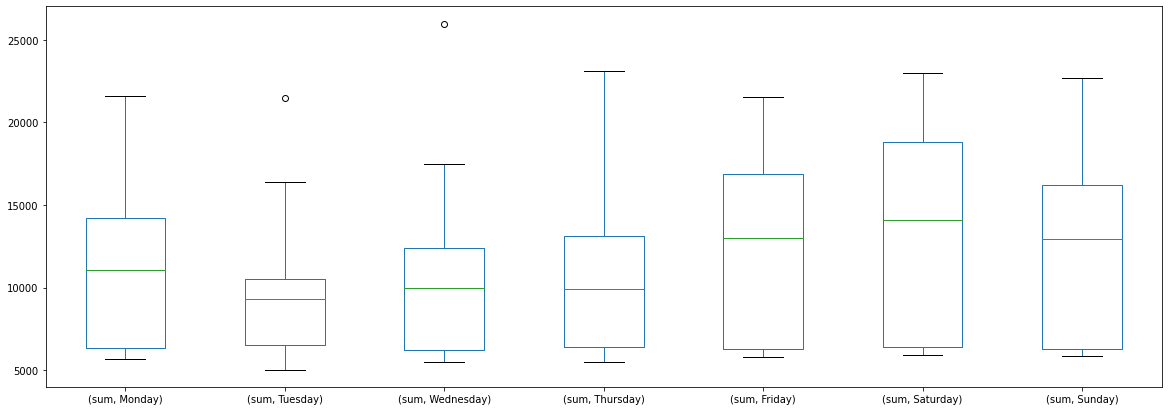

In [ ]:
table.plot.box(figsize=(20, 7))

In [ ]:
# Data sets in 30 minitues and 1 hour basis
df['date']=pd.to_datetime(df['date'])
df = df.set_index('date')
df_hour = df.resample('1H').mean()
df_30min =df.resample('30min').mean()

In [ ]:
# Qualitative predictors 
'''We assume that we have low(high) energy load when the appliances consumption is lower(higher) 
   than a given point of the hourly average counsumption. This point is dependent of data time frequency 
   and the numbers below are set after several tryouts based on appliances' consumption standard deviation.
'''

df['low_consum'] = (df.Appliances+25<(df.hour_avg))*1
df['high_consum'] = (df.Appliances+100>(df.hour_avg))*1

df_hour['low_consum'] = (df_hour.Appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum'] = (df_hour.Appliances+25>(df_hour.hour_avg))*1

df_30min['low_consum'] = (df_30min.Appliances+25<(df_30min.hour_avg))*1
df_30min['high_consum'] = (df_30min.Appliances+35>(df_30min.hour_avg))*1

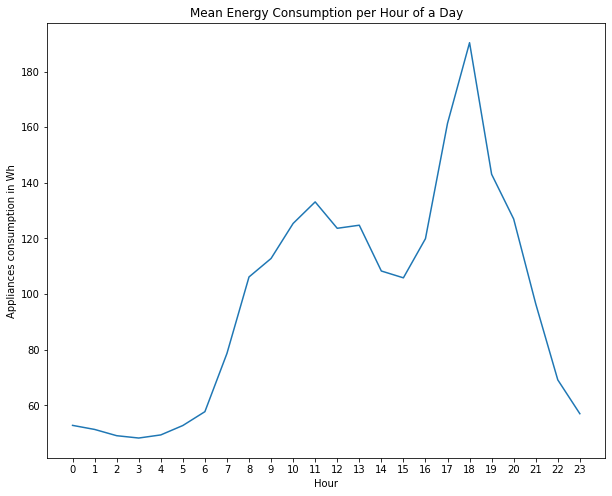

In [ ]:
# Plot of Mean Energy Consumption per Hour of a Day

df.groupby('hours')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

Text(0.5, 0, 'Appliances log(wH)')

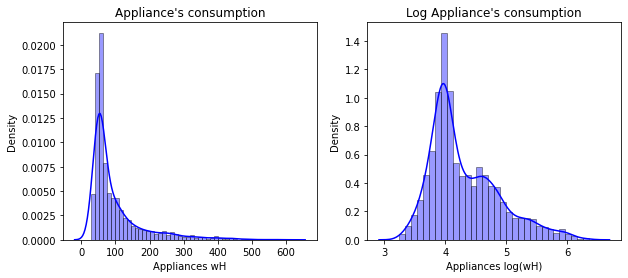

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(10,4))

sns.distplot(df_hour.Appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's consumption")
axes[0].set_xlabel('Appliances wH')

sns.distplot(df_hour.log_appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel('Appliances log(wH)')

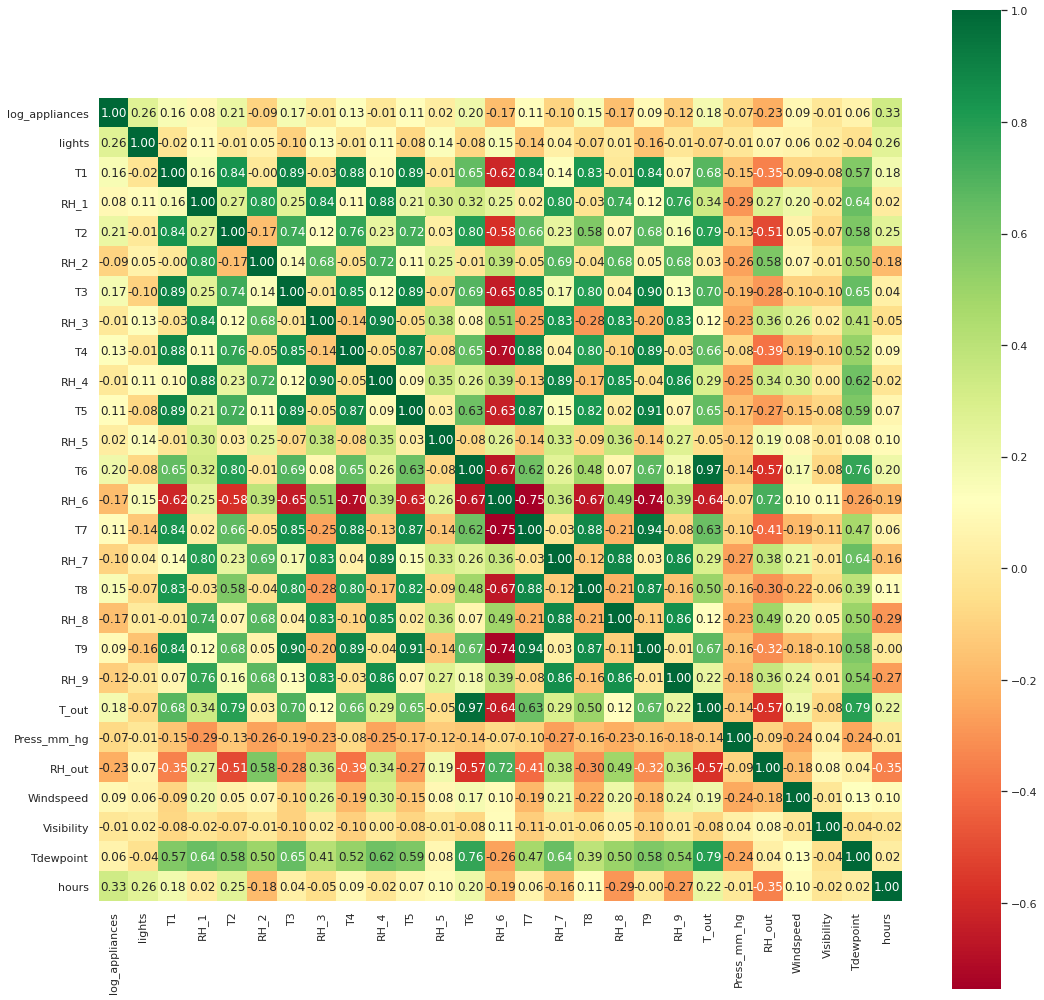

In [ ]:
col = ['log_appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint','hours']
corr = df[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

In [ ]:
for cat_feature in ['weekday', 'hours']:
    df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1)
    df_30min = pd.concat([df_30min, pd.get_dummies(df_30min[cat_feature])], axis=1)
    df = pd.concat([df, pd.get_dummies(df[cat_feature])], axis=1)

In [ ]:
feature_set = ['low_consum','high_consum','hours','t6','rh_6','lights','hour*lights',
               'tdewpoint','visibility','press_mm_hg','windspeed']

In [ ]:
# to avoid warnings from standardscaler
df_hour.lights = df_hour.lights.astype(float)
df_hour.log_appliances = df_hour.log_appliances.astype(float)
df_hour.hour = df_hour.hours.astype(float)
df_hour.low_consum = df_hour.low_consum.astype(float)
df_hour.high_consum = df_hour.high_consum.astype(float)

In [ ]:
# Creation of train/test sets
test_size=.2
test_index = int(len(df_hour.dropna())*(1-test_size))

X_train, X_test = df_hour[feature_set].iloc[:test_index,],df_hour[feature_set].iloc[test_index:,]
y_train = df_hour.log_appliances.iloc[:test_index,]

y_test =  df_hour.log_appliances.iloc[test_index:,]

In [ ]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,exact_date,hours,seconds,week,weekday,log_appliances,hour*lights,hour_avg,low_consum,high_consum,0,1,...,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11,17,0,Tuesday,1,4.094345,510,161.352657,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11,17,600,Tuesday,1,4.094345,510,161.352657,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11,17,1200,Tuesday,1,3.912023,510,161.352657,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11,17,1800,Tuesday,1,3.912023,680,161.352657,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11,17,2400,Tuesday,1,4.094345,680,161.352657,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X=df.drop(['Appliances',],axis=1)
y=df['Appliances']

In [ ]:
 # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
 
lr=LinearRegression()
lr.fit(X_train,y_train)
 
prediction_test_lr = lr.predict(X_test)